<a href="https://colab.research.google.com/github/j2nhyeok/self-study/blob/main/3_4_Feature_engineering(blank).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 피처엔지니어링
- 스케일
- 인코딩
- 데이터 : data_atype.zip (수업노트에서 다운로드)

In [4]:
# 데이터 불러오기
import pandas as pd
X_train = pd.read_csv('/content/drive/MyDrive/빅분기 실기/인프런_data/data_atype/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/빅분기 실기/인프런_data/data_atype/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/빅분기 실기/인프런_data/data_atype/X_test.csv')

In [5]:
# 데이터 샘플 확인
X_train.head()

,id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,3331,34.0,State-gov,177331,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Black,Male,4386,0,40.0,United-States
1,19749,58.0,Private,290661,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40.0,United-States
2,1157,48.0,Private,125933,Some-college,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,1669,38.0,United-States
3,693,58.0,Private,100313,Some-college,10,Married-civ-spouse,Protective-serv,Husband,White,Male,0,1902,40.0,United-States
4,12522,41.0,Private,195661,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,54.0,United-States


## 데이터 전처리 (이전시간 작업)

In [6]:
# X_train데이터
X_train['workclass'] = X_train['workclass'].fillna(X_train['workclass'].mode()[0])
X_train['native.country'] = X_train['native.country'].fillna(X_train['native.country'].mode()[0])
X_train['occupation'] = X_train['occupation'].fillna("X")
X_train['age'] = X_train['age'].fillna(int(X_train['age'].mean()))
X_train['hours.per.week'] = X_train['hours.per.week'].fillna(X_train['hours.per.week'].median())

# X_test데이터
X_test['workclass'] = X_test['workclass'].fillna(X_test['workclass'].mode()[0])
X_test['native.country']  = X_test['native.country'].fillna(X_test['native.country'].mode()[0])
X_test['occupation'] = X_test['occupation'].fillna("X")
X_test['age'] = X_test['age'].fillna(int(X_train['age'].mean()))
X_test['hours.per.week'] = X_test['hours.per.week'].fillna(X_train['hours.per.week'].median())

In [7]:
# 결측치 확인
X_train.isnull().sum()

id                0
age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

## 수치형 데이터와 범주형 데이터 분리

In [8]:
# 데이터 타입 확인
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29304 entries, 0 to 29303
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              29304 non-null  int64  
 1   age             29304 non-null  float64
 2   workclass       29304 non-null  object 
 3   fnlwgt          29304 non-null  int64  
 4   education       29304 non-null  object 
 5   education.num   29304 non-null  int64  
 6   marital.status  29304 non-null  object 
 7   occupation      29304 non-null  object 
 8   relationship    29304 non-null  object 
 9   race            29304 non-null  object 
 10  sex             29304 non-null  object 
 11  capital.gain    29304 non-null  int64  
 12  capital.loss    29304 non-null  int64  
 13  hours.per.week  29304 non-null  float64
 14  native.country  29304 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 3.4+ MB


In [11]:
# 수치형 컬럼과 범주형 컬럼 데이터 나누기
# n_train = X_train.select_dtypes(exclude='object').copy()
# n_test = X_test.select_dtypes(exclude='object').copy()

# c_train = X_train.select_dtypes(include='object').copy()
# c_test = X_test.select_dtypes(include='object').copy()


# 데이터를 매번 새롭게 불러오기 위해 함수로 제작 함
def get_nc_data():
    X_train = pd.read_csv('/content/drive/MyDrive/빅분기 실기/인프런_data/data_atype/X_train.csv')
    y_train = pd.read_csv('/content/drive/MyDrive/빅분기 실기/인프런_data/data_atype/y_train.csv')
    X_test = pd.read_csv('/content/drive/MyDrive/빅분기 실기/인프런_data/data_atype/X_test.csv')

    n_train = X_train.select_dtypes(exclude='object').copy()
    n_test = X_test.select_dtypes(exclude='object').copy()
    c_train = X_train.select_dtypes(include='object').copy()
    c_test = X_test.select_dtypes(include='object').copy()
    return n_train, n_test, c_train, c_test

n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기

In [12]:
# 데이처 확인(수치형 데이터)
n_train.head(2)

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,34.0,177331,10,4386,0,40.0
1,19749,58.0,290661,9,0,0,40.0


In [13]:
# 데이처 확인(범주형 데이터)
c_train.head(2)

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,State-gov,Some-college,Married-civ-spouse,Prof-specialty,Husband,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States


## 스케일링
- 트리기반의 모델은 입력의 스케일을 크게 신경쓰지 않아도 됨
- 선형회귀나 로지스틱 회귀 등과 같은 모델은 입력의 스케일링에 영향을 받음

In [17]:
# 스케일링 작업할 컬럼명
cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

In [19]:
# 민-맥스 스케일링 MinMaxScaler (모든 값이 0과 1사이)
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
display(n_train.head(2))
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(2))

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,34.0,177331,10,4386,0,40.0
1,19749,58.0,290661,9,0,0,40.0


,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,0.5625,0.112092,0.600000,0.04386,0.0,0.397959
1,19749,0.7500,0.189060,0.533333,0.00000,0.0,0.397959


In [21]:
# 표준화 StandardScaler (Z-score 정규화, 평균이 0 표준편차가 1인 표준 정규분포로 변경)
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
display(n_train.head(2))
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(2))

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,34.0,177331,10,4386,0,40.0
1,19749,58.0,290661,9,0,0,40.0


,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,-0.334094,-0.117678,-0.031447,0.440284,-0.216045,-0.035235
1,19749,1.426912,0.956304,-0.420434,-0.146290,-0.216045,-0.035235


In [23]:
# 로버스트 스케일링 : 중앙값과 사분위 값 활용, 이상치 영향 최소화 장점
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
display(n_train.head(2))
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])
display(n_train.head(2))

,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,34.0,177331,10,4386,0,40.0
1,19749,58.0,290661,9,0,0,40.0


,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
0,3331,-0.15,-0.008765,0.000000,4386.0,0.0,0.0
1,19749,1.05,0.941358,-0.333333,0.0,0.0,0.0


<Axes: >

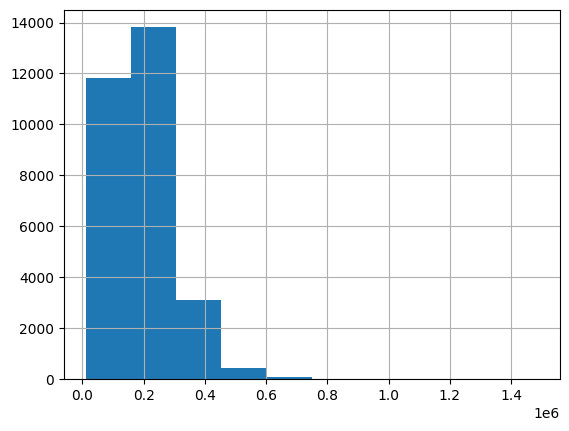

In [24]:
# 로그 변환 예시
X_train['fnlwgt'].hist()

In [25]:
# 로그 변환 전후 확인
import numpy as np
print(X_train['fnlwgt'][:3])
np.log1p(X_train['fnlwgt'])[:3]

0    177331
1    290661
2    125933
Name: fnlwgt, dtype: int64


0    12.085779
1    12.579916
2    11.743513
Name: fnlwgt, dtype: float64

<Axes: >

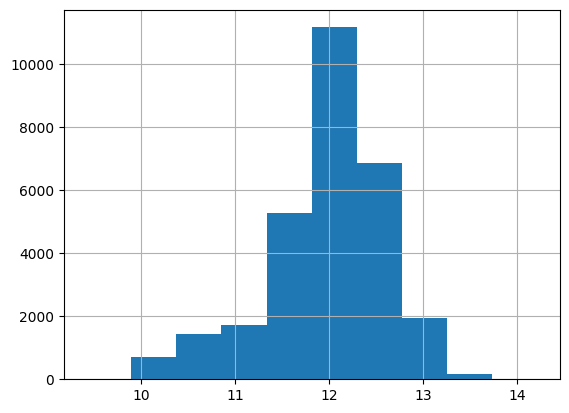

In [27]:
# 로그 변환 후 시각화
np.log1p(X_train['fnlwgt']).hist()

In [28]:
# np.exp -> 다시 원래의 값으로 복구, 1~2 정도 값 차이가 날 수 있음
np.exp(np.log1p(X_train['fnlwgt']))

0        177332.0
1        290662.0
2        125934.0
3        100314.0
4        195662.0
           ...   
29299     47169.0
29300    231794.0
29301    201436.0
29302    137723.0
29303    406979.0
Name: fnlwgt, Length: 29304, dtype: float64

## 인코딩
- 라벨(label) 인코딩
- 원핫(one-hot) 인코딩

In [29]:
# 범주형 데이터 확인(인코딩 전)
c_train.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,State-gov,Some-college,Married-civ-spouse,Prof-specialty,Husband,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
2,Private,Some-college,Widowed,Exec-managerial,Unmarried,Black,Female,United-States
3,Private,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
4,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States


In [36]:
# object 컬럼명
cols = list(c_train.columns[c_train.dtypes == object])
cols

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

In [37]:
# 라벨 인코딩
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in cols:
  le = LabelEncoder()
  c_train[col] = le.fit_transform(c_train[col])
  c_test[col]  = le.transform(c_test[col])




In [38]:
# 범주형 데이터 확인(인코딩 후)
c_train.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,6,15,2,9,0,2,1,38
1,3,11,2,2,0,4,1,38
2,3,15,6,3,4,2,0,38
3,3,15,2,10,0,4,1,38
4,3,15,2,13,0,4,1,38


In [39]:
# 원핫 인코딩
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기

display(c_train.head())
c_train = pd.get_dummies(c_train[cols])
c_test = pd.get_dummies(c_test[cols])
display(c_train.head())

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,State-gov,Some-college,Married-civ-spouse,Prof-specialty,Husband,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
2,Private,Some-college,Widowed,Exec-managerial,Unmarried,Black,Female,United-States
3,Private,Some-college,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
4,Private,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,United-States


,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## 데이터 합치기

In [41]:
# 분리한 데이터 다시 합침
X_train = pd.concat([n_train, c_train], axis = 1)
X_test = pd.concat([n_test, c_test], axis = 1)
print(X_train.shape, X_test.shape)
X_train.head()

# 열을 보면 개수가 맞지 않음. 개수가 무조건 같아야 함.
# 원인은 테스트 데이터의 나라의 종류가 더 많아서, 원-핫 인코딩 할 때 열이 더 생김
# 이런 경우 맨 처음부터 train 데이터와 test 데이터를 합친 다음 인코딩 하고 다시 분리 해줘야 함.

(29304, 106) (3257, 102)


,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,3331,34.0,177331,10,4386,0,40.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,19749,58.0,290661,9,0,0,40.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1157,48.0,125933,10,0,1669,38.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,693,58.0,100313,10,0,1902,40.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,12522,41.0,195661,10,0,0,54.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [55]:
# 데이터 새로 불러오기
import pandas as pd

X_train = pd.read_csv('/content/drive/MyDrive/빅분기 실기/인프런_data/data_atype/X_train.csv')
y_train = pd.read_csv('/content/drive/MyDrive/빅분기 실기/인프런_data/data_atype/y_train.csv')
X_test = pd.read_csv('/content/drive/MyDrive/빅분기 실기/인프런_data/data_atype/X_test.csv')

In [56]:
# train, test 합쳐서 인코딩 후 분리하기

cols = list(X_train.columns[X_train.dtypes == object])
print(X_train.shape, X_test.shape)

all_df = pd.concat([X_train, X_test]) # 기본 설정은 위아래
all_df = pd.get_dummies(all_df[cols])

line = int(X_train.shape[0])
X_train = all_df.iloc[:line, :].copy()
display(X_train)
X_test = all_df.iloc[line:, :].copy()
display(X_test)

print(X_train.shape, X_test.shape)

(29304, 15) (3257, 15)


,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29299,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
29300,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29301,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
29302,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,education_11th,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3252,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3253,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3254,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3255,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(29304, 99) (3257, 99)


## 정리

In [63]:
# 데이터 분리
n_train, n_test, c_train, c_test = get_nc_data() # 데이터 새로 불러오기

In [64]:
# 수치형 - 민맥스 스케일링
cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
n_train[cols] = scaler.fit_transform(n_train[cols])
n_test[cols] = scaler.transform(n_test[cols])

In [65]:
# 라벨 인코딩
cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cols:
  le = LabelEncoder()
  c_train[col] = le.fit_transform(c_train[col])
  c_test[col] = le.transform(c_test[col])


In [66]:
# 분리한 데이터 다시 합침
X_train = pd.concat([n_train, c_train], axis = 1)
X_test = pd.concat([n_test, c_test], axis = 1)
print(X_train.shape, X_test.shape)
X_train.head()

(29304, 15) (3257, 15)


,id,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,3331,0.562500,0.112092,0.600000,0.04386,0.000000,0.397959,6,15,2,9,0,2,1,38
1,19749,0.750000,0.189060,0.533333,0.00000,0.000000,0.397959,3,11,2,2,0,4,1,38
2,1157,0.671875,0.077184,0.600000,0.00000,0.383150,0.377551,3,15,6,3,4,2,0,38
3,693,0.750000,0.059785,0.600000,0.00000,0.436639,0.397959,3,15,2,10,0,4,1,38
4,12522,0.617188,0.124541,0.600000,0.00000,0.000000,0.540816,3,15,2,13,0,4,1,38


In [ ]:
# 데이터 확인
